In [63]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]], dtype=uint8)
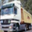

In [5]:
x_train[1]

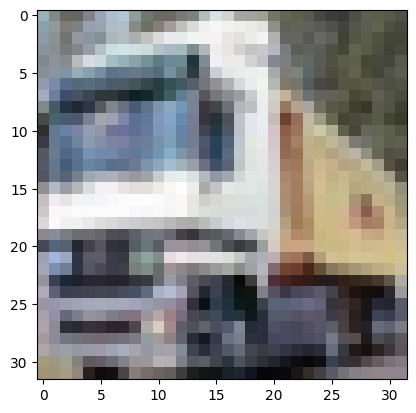

In [6]:
plt.imshow(x_train[1])

In [7]:
y_train.shape, y_test.shape

((50000, 1), (10000, 1))

In [8]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
y_test = y_test.reshape(-1,)

In [11]:
y_train.shape, y_test.shape

((50000,), (10000,))

In [12]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [13]:
def plot_sample(x, y, index):
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

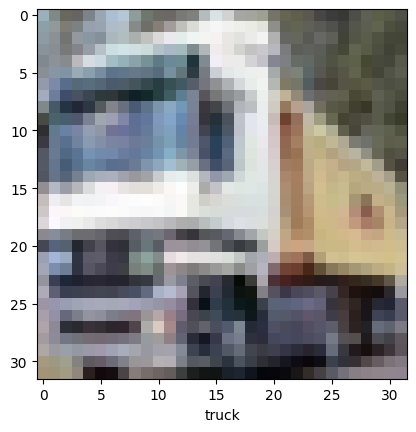

In [14]:
plot_sample(x_train, y_train, 1)

In [15]:
# Normalizing Pixel values
x_train = x_train / 255
x_test = x_test / 255

In [40]:
ann =models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = ann.fit(x_train, y_train, epochs=20)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.2716 - loss: 2.2337
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3883 - loss: 1.6953
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4249 - loss: 1.6107
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4451 - loss: 1.5490
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4631 - loss: 1.4985
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4714 - loss: 1.4762
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4796 - loss: 1.4445
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4906 - loss: 1.4145
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5009 - loss: 1.3934
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5050 - loss: 1.3769
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5147 - loss: 1.3535
Epoch 12/20
1563/1563 ━━━━━

In [41]:
from sklearn.metrics import classification_report
y_pred_ann = ann.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [42]:
y_pred_ann_classes = [np.argmax(pred) for pred in y_pred_ann]
y_pred_ann_classes[:5]

[np.int64(8), np.int64(9), np.int64(8), np.int64(8), np.int64(4)]

In [43]:
print(classification_report(y_test, y_pred_ann_classes))

              precision    recall  f1-score   support

           0       0.50      0.59      0.54      1000
           1       0.67      0.50      0.57      1000
           2       0.36      0.38      0.37      1000
           3       0.35      0.27      0.30      1000
           4       0.37      0.48      0.41      1000
           5       0.43      0.39      0.40      1000
           6       0.46      0.59      0.52      1000
           7       0.61      0.47      0.53      1000
           8       0.60      0.62      0.61      1000
           9       0.56      0.53      0.54      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.48     10000
weighted avg       0.49      0.48      0.48     10000



### CNN

In [58]:
cnn =models.Sequential([
    #CNN
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    #Dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_cnn = cnn.fit(x_train, y_train, epochs=20)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3795 - loss: 1.6918
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5976 - loss: 1.1450
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6541 - loss: 0.9925
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6945 - loss: 0.8864
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7171 - loss: 0.8127
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7363 - loss: 0.7550
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7573 - loss: 0.6946
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7750 - loss: 0.6512
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7874 - loss: 0.6084
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8050 - loss: 0.5659
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8172 - loss: 0.5288
Epoch 12/20
1563/1563 ━━━━━━

In [59]:
y_pred_cnn = cnn.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [60]:
y_pred_cnn_classes = [np.argmax(pred) for pred in y_pred_cnn]
y_pred_cnn_classes[:5]

[np.int64(3), np.int64(8), np.int64(9), np.int64(0), np.int64(6)]

In [61]:
print(classification_report(y_test, y_pred_cnn_classes))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73      1000
           1       0.82      0.80      0.81      1000
           2       0.63      0.56      0.59      1000
           3       0.48      0.55      0.51      1000
           4       0.67      0.61      0.64      1000
           5       0.57      0.62      0.60      1000
           6       0.77      0.76      0.76      1000
           7       0.75      0.70      0.73      1000
           8       0.80      0.78      0.79      1000
           9       0.78      0.78      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



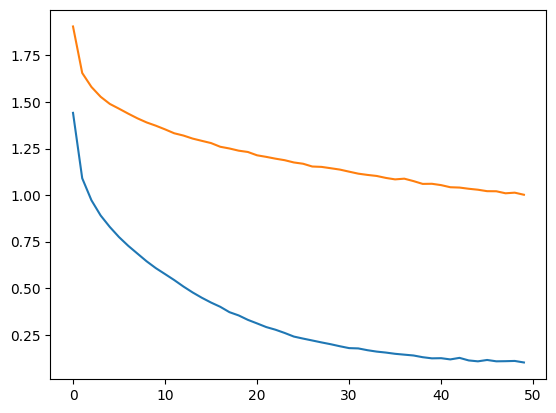

In [ ]:
plt.plot(history_cnn.history['loss'])
plt.plot(history.history['loss'])

### Transfer Learning using MobileNet

In [82]:
from tensorflow.keras.applications import MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

<ipython-input-82-86a66bfa7327>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


In [83]:
base_model.trainable = False

In [84]:
for layer in base_model.layers[-20:]:
    layer.trainable = True

In [85]:
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),  # Fully connected layer
    # layers.Dropout(0.5),  # Dropout layer to avoid overfitting
    layers.Dense(10, activation='softmax')  # Output layer for CIFAR-10 (10 classes)
])

In [86]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [87]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 1, 1, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,430,858 (9.27 MB)

 Trainable params: 1,378,954 (5.26 MB)

 Non-trainable params: 1,051,904 (4.01 MB)

In [88]:
history_mv = model.fit(
    x_train, y_train,
    epochs=20,
    validation_data=(x_test, y_test)
)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 19ms/step - accuracy: 0.3653 - loss: 1.8161 - val_accuracy: 0.4091 - val_loss: 1.7759
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.5609 - loss: 1.2460 - val_accuracy: 0.5570 - val_loss: 1.3248
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6081 - loss: 1.1091 - val_accuracy: 0.5981 - val_loss: 1.1796
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.6380 - loss: 1.0274 - val_accuracy: 0.6069 - val_loss: 1.1762
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.6656 - loss: 0.9468 - val_accuracy: 0.6129 - val_loss: 1.1658
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.6834 - loss: 0.8866 - val_accuracy: 0.6268 - val_loss: 1.1565
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.7019 - loss: 0.8372 - val_accuracy: 0.6195 - val_loss: 1.1575
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7235 - lo

In [89]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6181 - loss: 1.4835
Test accuracy: 61.64%


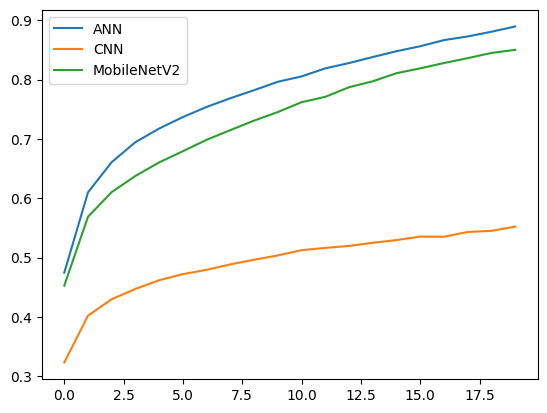

In [90]:
plt.plot(history_cnn.history['accuracy'], label='ANN')
plt.plot(history.history['accuracy'], label='CNN')
plt.plot(history_mv.history['accuracy'], label='MobileNetV2')

plt.legend()